<a href="https://colab.research.google.com/github/Alirizahm/Call_Centre_Monitoring_Performance_Report/blob/main/The_agent_receive_call_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   **Author : Aliriza Hamonangan Matondang**
*   **Email : riza.ali18@gmail.com**
*   **LinkedIn : https://www.linkedin.com/in/alirizahm/**





# Import and Install

In [ ]:
!pip install sktime[all_extras]

In [ ]:
# utilities packages
import datetime

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import STL

# load sktime for time series forecasting
from sktime.utils.plotting import plot_series # from plotting
from sktime.forecasting.naive import NaiveForecaster # for naive forecasting
from sktime.forecasting.arima import AutoARIMA # for automated ARIMA forecasting
from sktime.forecasting.arima import ARIMA # for automated ARIMA forecasting
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # for exponential smoothing forecasting
from sktime.forecasting.fbprophet import Prophet # for Prophet forecasting
from sktime.forecasting.base import ForecastingHorizon # for creating forecast horizon
from sktime.forecasting.model_selection import (
    temporal_train_test_split,
    ExpandingWindowSplitter,
    SlidingWindowSplitter
) # for train-test split and cross validation
from sktime.performance_metrics.forecasting import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
) # for evaluation metrics
from sktime.forecasting.model_evaluation import evaluate # for evaluating CV results

from functools import reduce

%matplotlib inline

# Read Data

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
# read data and put it in a dataframe
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1sFOYg2KWqFsgjDClcwwE8J9WhDv9QxZhqc-oteDN9oY/edit#gid=478531610')
sheets = gsheets.worksheet('combine all forcast data').get_all_values()
df = pd.DataFrame(sheets[1:], columns=sheets[0])

In [ ]:
# check the first 5 rows
df.head()

,Index,Date,count Call Id
0,1,1/1/2022,58
1,2,1/2/2022,60
2,3,1/3/2022,58
3,4,1/4/2022,54
4,5,1/5/2022,56


In [ ]:
# check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          365 non-null    object
 1   Date           365 non-null    object
 2   count Call Id  365 non-null    object
dtypes: object(3)
memory usage: 8.7+ KB


In [ ]:
df['count Call Id'] = df['count Call Id'].astype(int)

In [ ]:
df.drop(['Index'], axis = 1, inplace = True)

In [ ]:
# change month column to date type
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [ ]:
# renaming certain column
df = df.rename(columns={"count Call Id": "Total_Call"})

In [ ]:
# set Date as index
df = df.set_index('Date')
df.index = pd.PeriodIndex(df.index, freq = 'D')

In [ ]:
# check the first 5
df.head()

,Total_Call
Date,
2022-01-01,58
2022-01-02,60
2022-01-03,58
2022-01-04,54
2022-01-05,56


In [ ]:
# check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 365 entries, 2022-01-01 to 2022-12-31
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total_Call  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


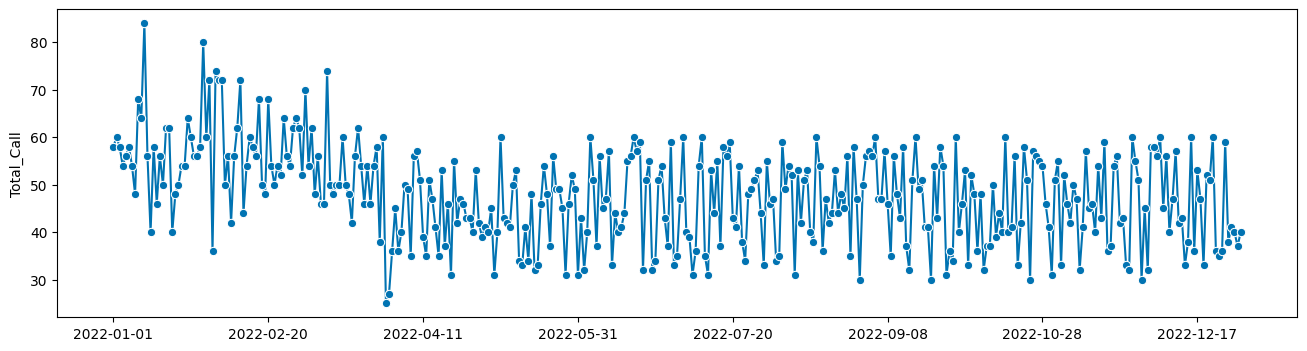

In [ ]:
plot_series(df['Total_Call']);

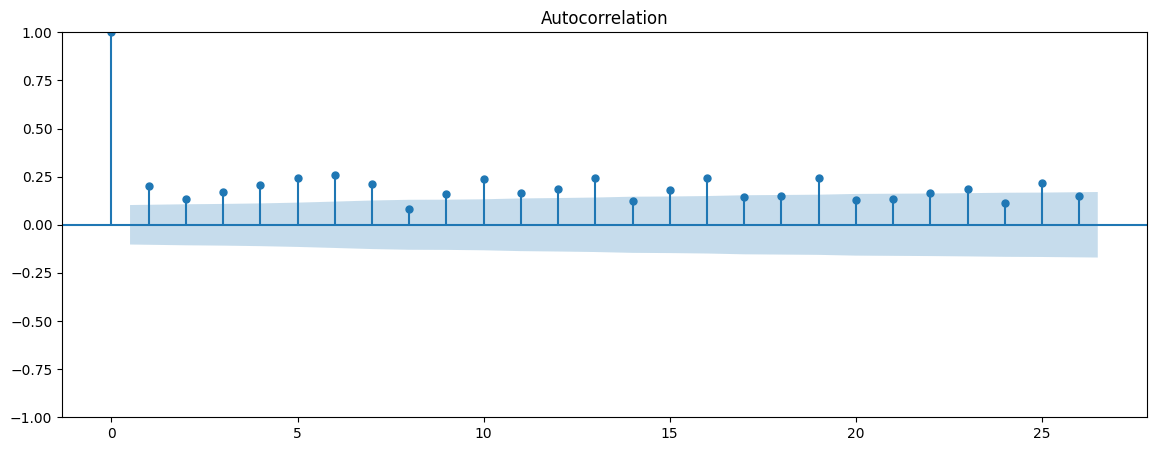

In [ ]:
plot_acf(df['Total_Call']).set_size_inches((14,5));

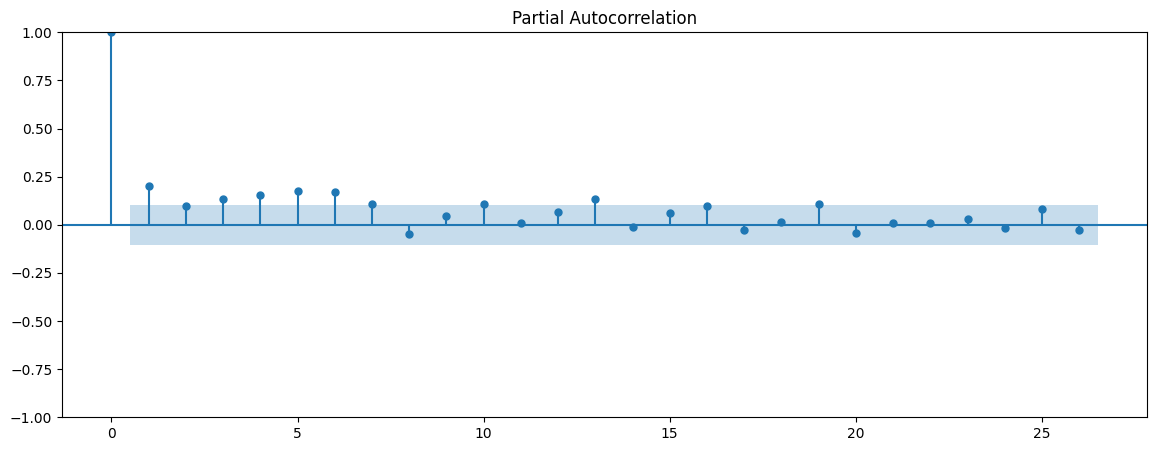

In [ ]:
plot_pacf(df['Total_Call']).set_size_inches((14,5));

# Conlusion

*   The datasaet almost has no trend.
*   There is no seasonality pattern.
*   ACF and PACF has a pattern.
*   The dataset has a stationary pattern.
*   The best assumption of the fit model for this dataset is arima.








# CV

In [ ]:
# Do train-test split
y_train, y_test = df[:-122], df[-122:]

In [ ]:
# define NaiveForecaster model
naive_forecaster = NaiveForecaster(strategy="last", sp=30)

In [ ]:
# define CV object
cv = ExpandingWindowSplitter(
    initial_window =30,
    step_length = 10,
    fh = np.arange(1,11)
)

In [ ]:
results = evaluate(forecaster=naive_forecaster, y=y_train, cv=cv, strategy="refit", return_data=True)

In [ ]:
# check results from CV
results

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff,y_train,y_test,y_pred
0,0.248281,0.006507,0.048219,30,2022-01-30,Total_Call 2022-01-01 58 ...,Total_Call 2022-01-31 60 ...,Total_Call 2022-01-31 58.0 ...
1,0.161191,0.002721,0.056438,40,2022-02-09,Total_Call 2022-01-01 58 ...,Total_Call 2022-02-10 62 ...,Total_Call 2022-02-10 84.0 ...
2,0.109301,0.002856,0.055430,50,2022-02-19,Total_Call 2022-01-01 58 ...,Total_Call 2022-02-20 68 ...,Total_Call 2022-02-20 48.0 ...
3,0.258898,0.002951,0.053106,60,2022-03-01,Total_Call 2022-01-01 58 ...,Total_Call 2022-03-02 62 ...,Total_Call 2022-03-02 60.0 ...
4,0.221866,0.002609,0.053838,70,2022-03-11,Total_Call 2022-01-01 58 ...,Total_Call 2022-03-12 50 ...,Total_Call 2022-03-12 62.0 ...
5,0.424570,0.002675,0.049840,80,2022-03-21,Total_Call 2022-01-01 58 ...,Total_Call 2022-03-22 54 ...,Total_Call 2022-03-22 68.0 ...
6,0.385516,0.002845,0.052461,90,2022-03-31,Total_Call 2022-01-01 58 ...,Total_Call 2022-04-01 36 ...,Total_Call 2022-04-01 62.0 ...
7,0.307577,0.004014,0.054394,100,2022-04-10,Total_Call 2022-01-01 58 ...,Total_Call 2022-04-11 39 ...,Total_Call 2022-04-11 50.0 ...
8,0.176154,0.002952,0.053267,110,2022-04-20,Total_Call 2022-01-01 58 ...,Total_Call 2022-04-21 55 ...,Total_Call 2022-04-21 54.0 ...
9,0.210023,0.002682,0.048748,120,2022-04-30,Total_Call 2022-01-01 58 ...,Total_Call 2022-05-01 41 ...,Total_Call 2022-05-01 36.0 ...


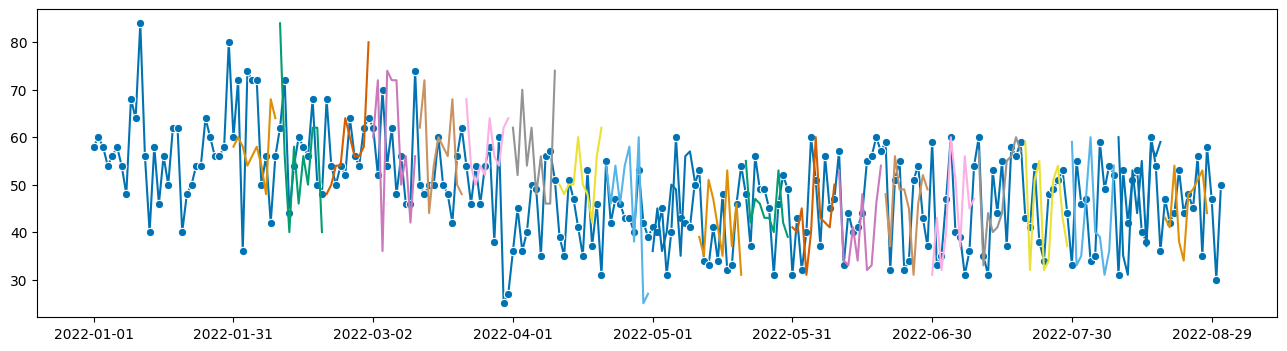

In [ ]:
# plot CV results
plot_series(
    y_train,
    results["y_pred"].iloc[0],
    results["y_pred"].iloc[1],
    results["y_pred"].iloc[2],
    results["y_pred"].iloc[3],
    results["y_pred"].iloc[4],
    results["y_pred"].iloc[5],
    results["y_pred"].iloc[6],
    results["y_pred"].iloc[7],
    results["y_pred"].iloc[8],
    results["y_pred"].iloc[9],
    results["y_pred"].iloc[10],
    results["y_pred"].iloc[11],
    results["y_pred"].iloc[12],
    results["y_pred"].iloc[13],
    results["y_pred"].iloc[14],
    results["y_pred"].iloc[15],
    results["y_pred"].iloc[16],
    results["y_pred"].iloc[17],
    results["y_pred"].iloc[18],
    results["y_pred"].iloc[19],
    results["y_pred"].iloc[20],
    markers=["o", "", "", "", "","","", "", "", "","","", "", "", "","","", "", "", "","",""]
);

# Conclusion

*   Best CV window_length=180.
*   window_length=180 is fit with the dataset.



# Naive Forecast

In [ ]:
#specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [ ]:
fh

ForecastingHorizon(['2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04',
             '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
             '2022-09-09', '2022-09-10',
             ...
             '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
             '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
             '2022-12-30', '2022-12-31'],
            dtype='period[D]', length=122, is_relative=False)

In [ ]:
# define NaiveForecaster model
naive_forecaster = NaiveForecaster(strategy="last", window_length=180, sp=30)

In [ ]:
# fit model to train data
naive_forecaster.fit(y = y_train)

NaiveForecaster(sp=30, window_length=180)

In [ ]:
y_pred = naive_forecaster.predict(fh)

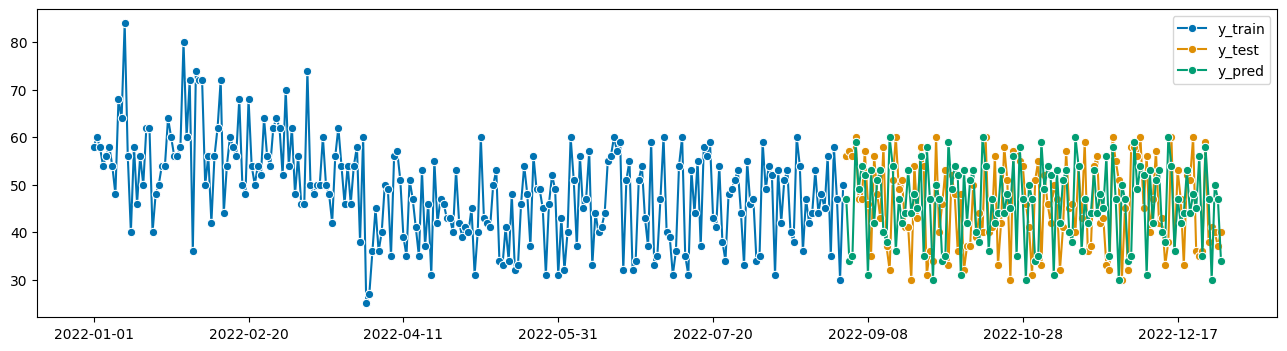

In [ ]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [ ]:
# find residuals
residuals = y_test - y_pred

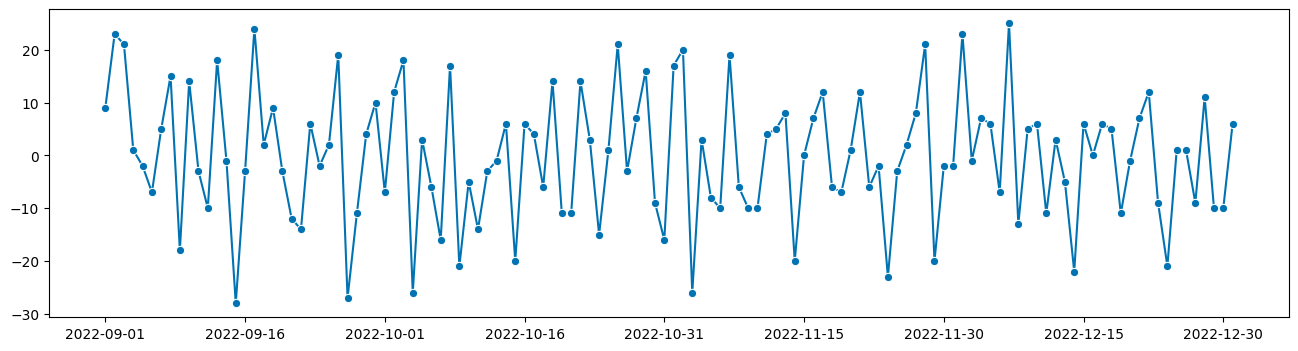

In [ ]:
plot_series(residuals);

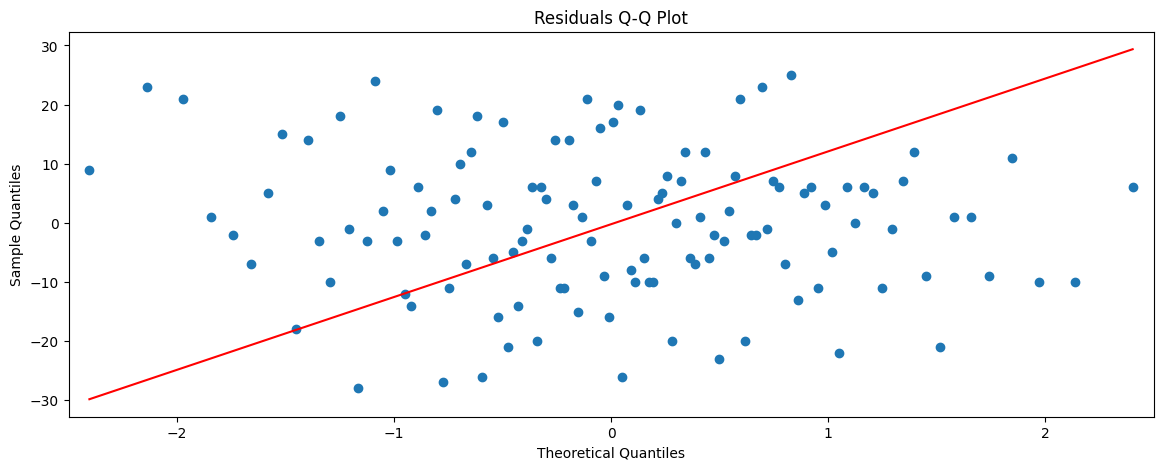

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<Axes: xlabel='Total_Call', ylabel='Count'>

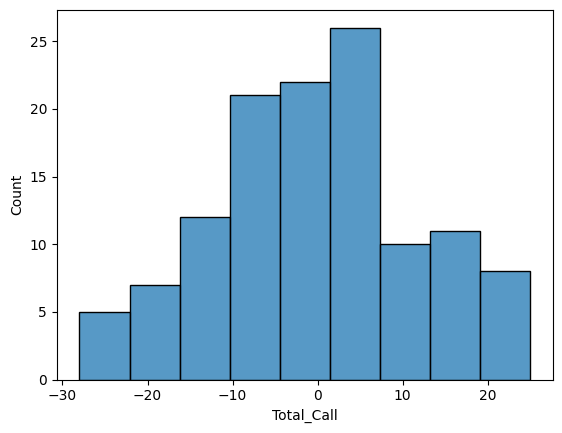

In [ ]:
sns.histplot(data = residuals, x = "Total_Call")

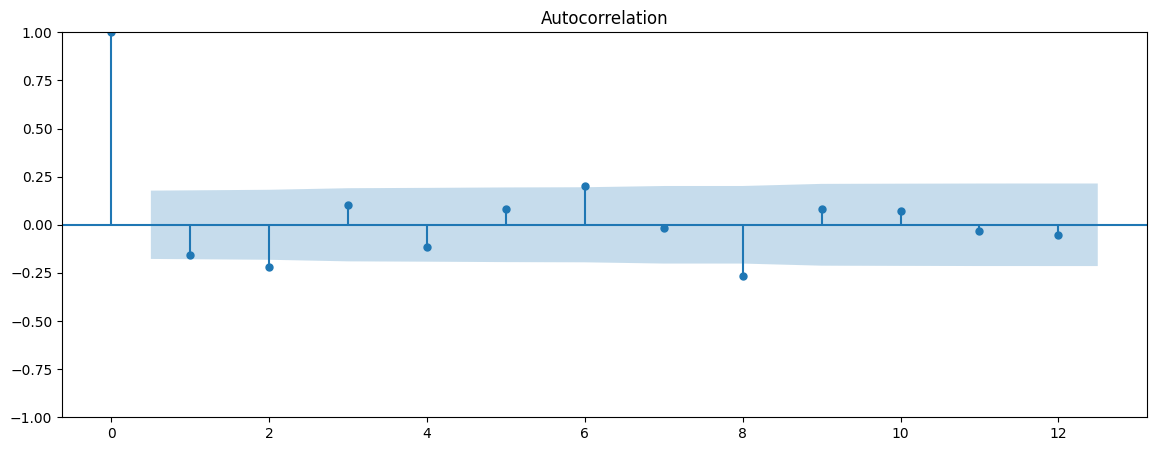

In [ ]:
# ACF plot
plot_acf(
    residuals,
    lags = 12
).set_size_inches((14,5));

In [ ]:
sm.stats.acorr_ljungbox(residuals, lags = 12, return_df=True)

,lb_stat,lb_pvalue
1,3.118026,0.077431
2,9.244612,0.009830
3,10.574309,0.014265
4,12.300272,0.015253
5,13.132071,0.022172
6,18.443379,0.005215
7,18.492277,0.009936
8,28.068820,0.000461
9,29.009106,0.000646
10,29.727571,0.000949


Autocorrelation Test using Ljung-Box Test

*   Null hypothesis: The residuals are independently distributed.
*   Alternate hypothesis: The residuals are not independently distributed; they exhibit serial correlation.

Reject null hypothesis if p-value less than 5%

**Interpretation**: Because p-value less than 5%, then we can reject the null hypothesis of the test and conclude that the residuals are not independent.

In [ ]:
mean_absolute_error(y_test, y_pred)

9.959016393442623

In [ ]:
mean_squared_error(y_test, y_pred)

151.74590163934425

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

12.3185186463042

# Conclusion

*   The error level is 12 %.
*   The residual is quite good (white noise).
*   The data is quite normal.
*   There is still autocorrelation on residual.
*   Short term forecasting (8 days).

# Predict next value by naive

In [ ]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2022-09-1", periods=130, freq="D")), is_relative=False
)
fh

ForecastingHorizon(['2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04',
             '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
             '2022-09-09', '2022-09-10',
             ...
             '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
             '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
             '2023-01-07', '2023-01-08'],
            dtype='period[D]', length=130, is_relative=False)

In [ ]:
cutoff = pd.Period("2022-09-1", freq="D")
fh.to_relative(cutoff)
fh.to_absolute(cutoff)

ForecastingHorizon(['2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04',
             '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
             '2022-09-09', '2022-09-10',
             ...
             '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
             '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
             '2023-01-07', '2023-01-08'],
            dtype='period[D]', length=130, is_relative=False)

In [ ]:
naive_forecaster = NaiveForecaster(strategy="last", window_length=180, sp=30)

In [ ]:
# fit model to train data
naive_forecaster.fit(y = y_train)

NaiveForecaster(sp=30, window_length=180)

In [ ]:
y_pred_naive = naive_forecaster.predict(fh)

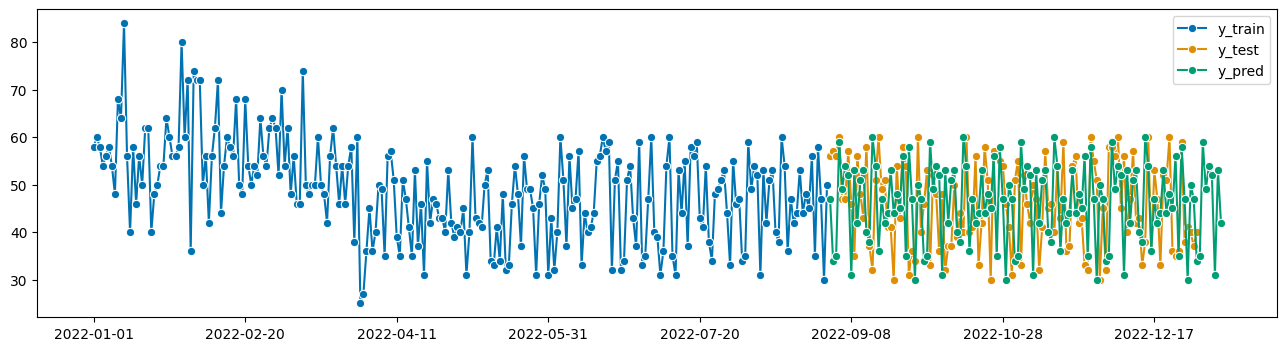

In [ ]:
plot_series(y_train, y_test, y_pred_naive, labels=["y_train", "y_test", "y_pred"]);

# Arima

In [ ]:
df_arima = df.copy()

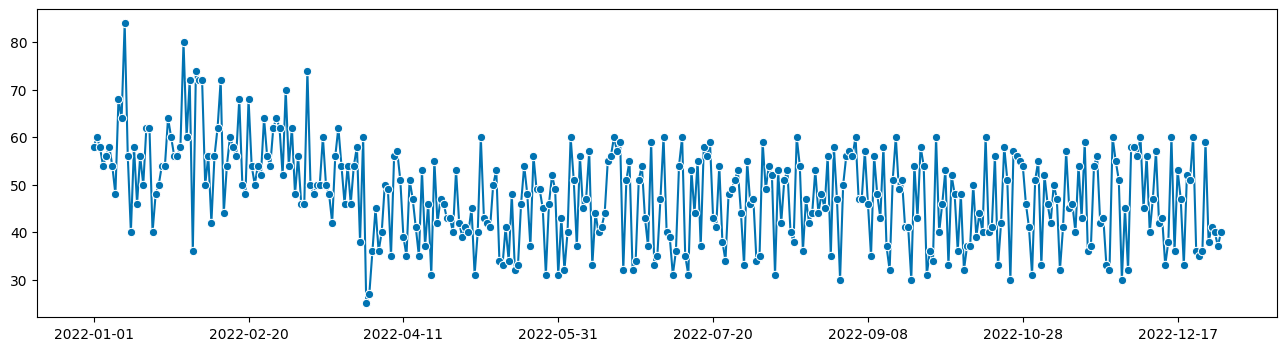

In [ ]:
plot_series(df_arima);

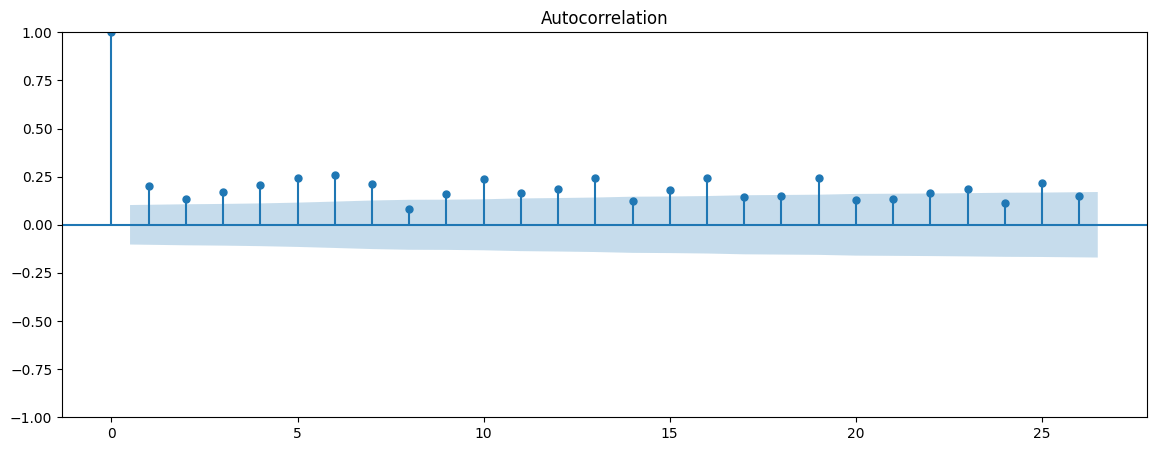

In [ ]:
# plot ACF
plot_acf(df_arima).set_size_inches((14,5));

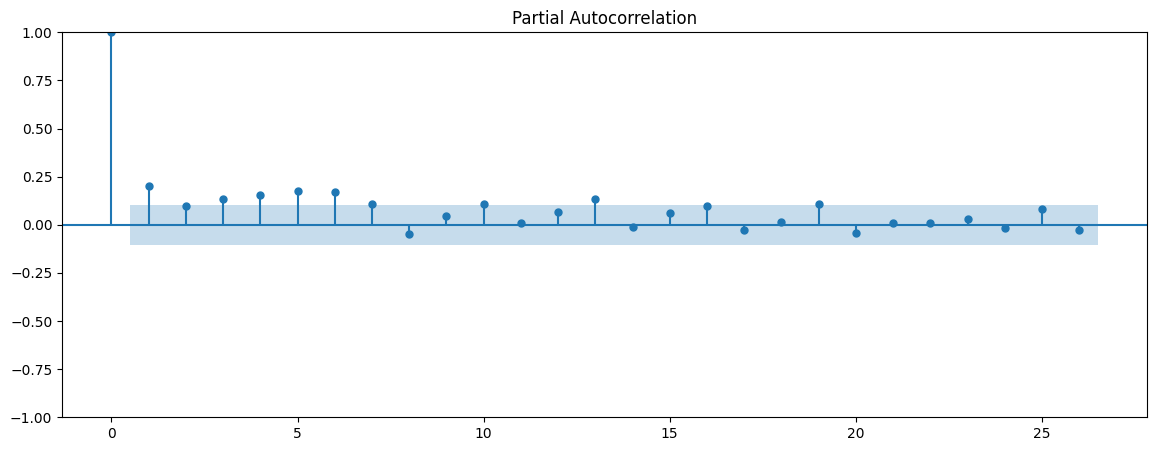

In [ ]:
# plot PACF
plot_pacf(df_arima).set_size_inches((14,5));

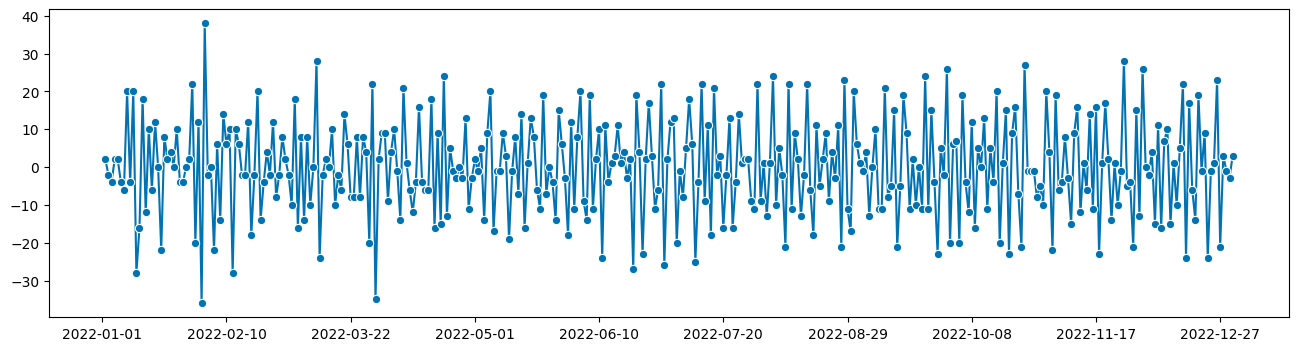

In [ ]:
# plot time series data
plot_series(df_arima.diff());

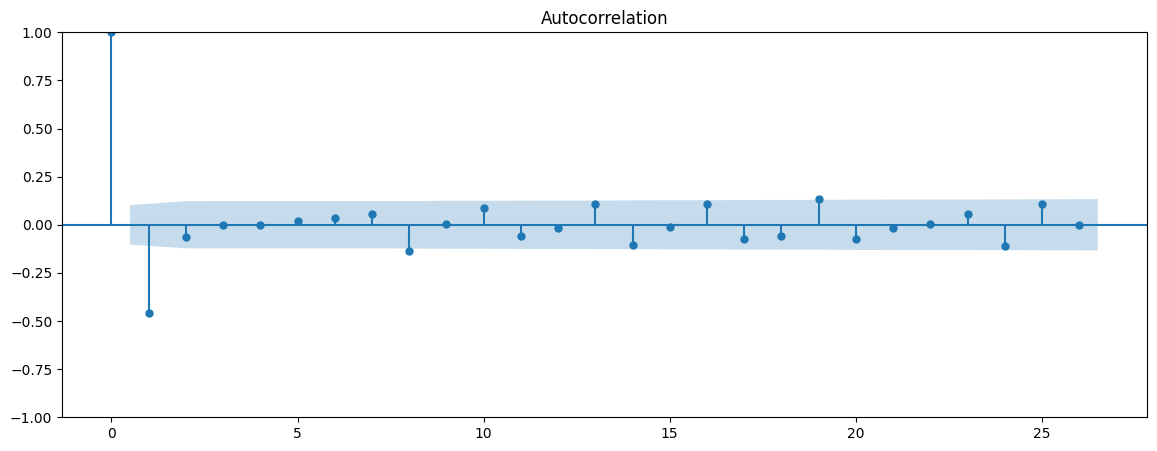

In [ ]:
# plot ACF
plot_acf(df_arima.diff().dropna()).set_size_inches((14,5));

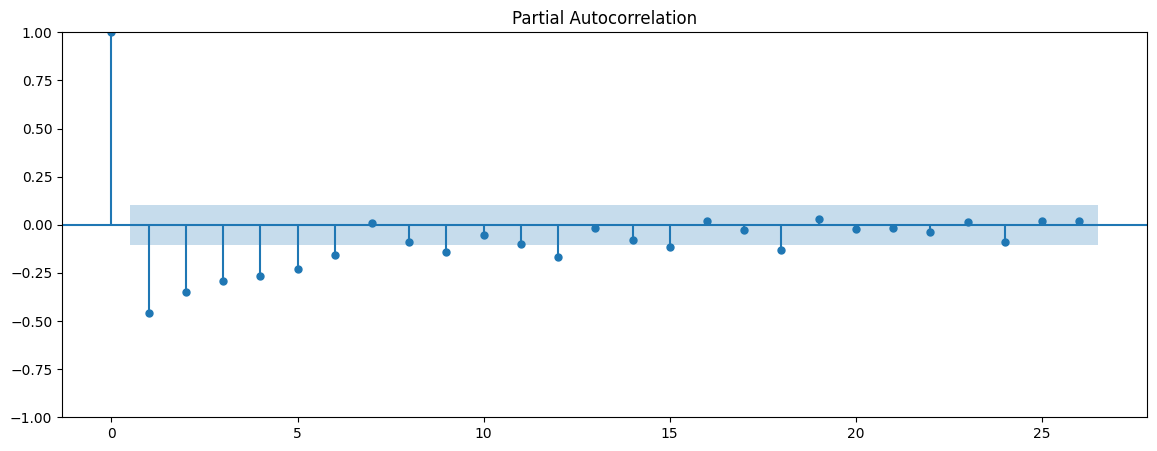

In [ ]:
# plot PACF
plot_pacf(df_arima.diff().dropna()).set_size_inches((14,5));

**Conclusion** arima (0,1,1)

*   PACF Plot has pattern
*   ACF Plot has no pattern



In [ ]:
# Do train-test split
y_train_arima, y_test_arima = df_arima[:-122], df_arima[-122:]
fh_arima = ForecastingHorizon(y_test_arima.index, is_relative=False)

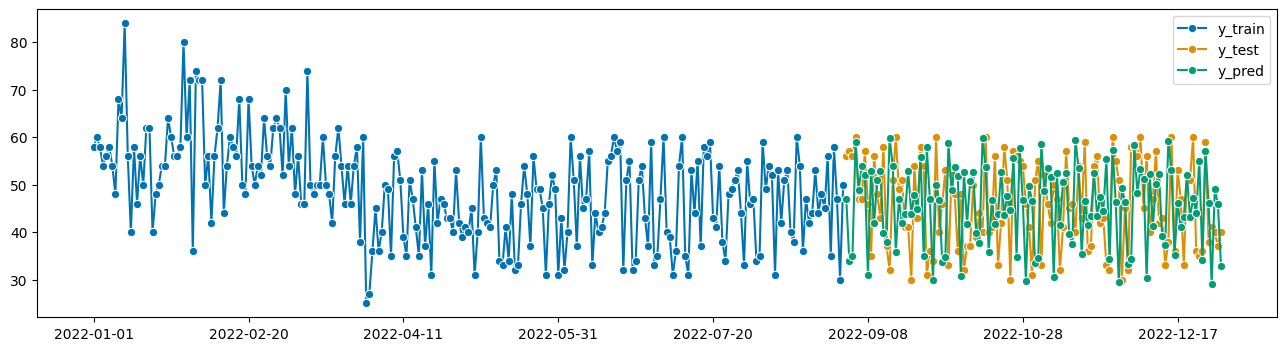

In [ ]:
forecaster_arima = ARIMA(order=(0,1,1), seasonal_order=(0, 1, 0, 30), suppress_warnings=True)

forecaster_arima.fit(y_train_arima)
y_pred_arima = forecaster_arima .predict(fh_arima)
plot_series(y_train_arima, y_test_arima, y_pred_arima, labels=["y_train", "y_test", "y_pred"]);

In [ ]:
# find residuals
residuals = y_test_arima - y_pred_arima

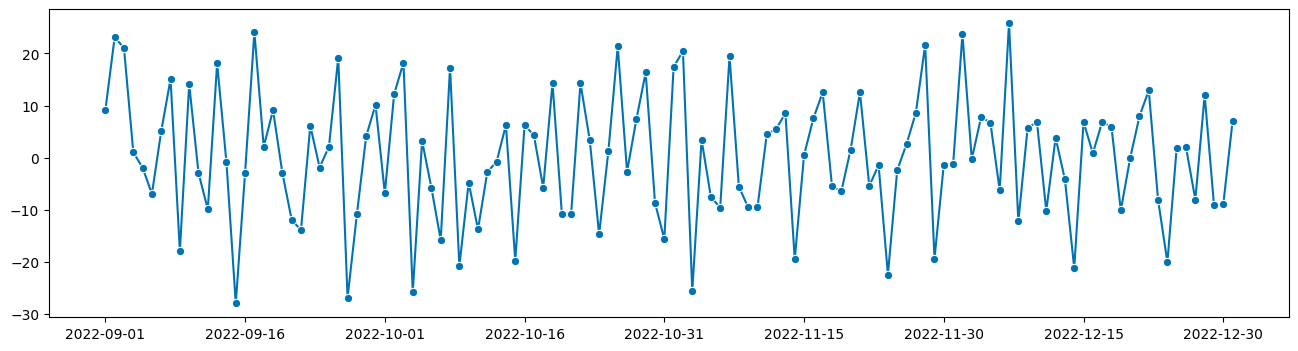

In [ ]:
plot_series(residuals);

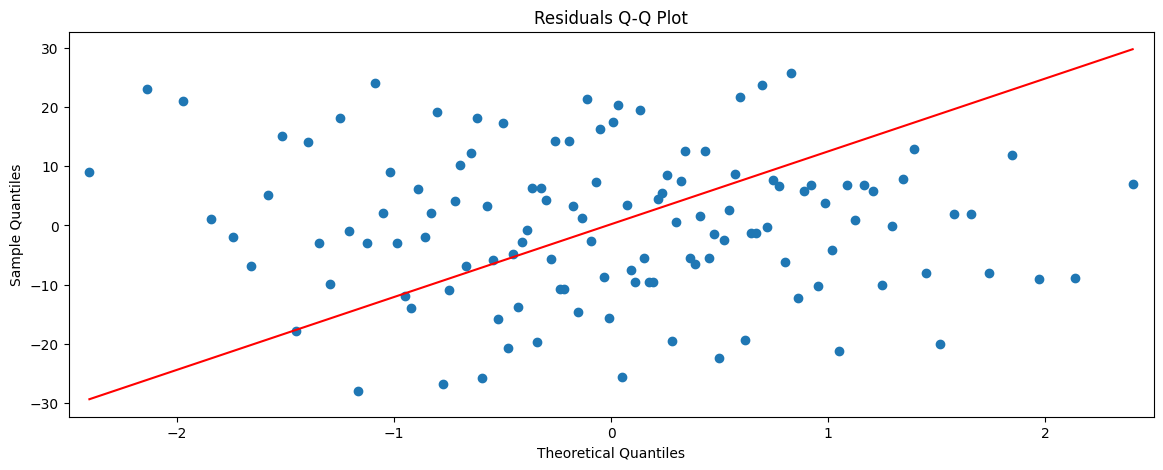

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<Axes: xlabel='Total_Call', ylabel='Count'>

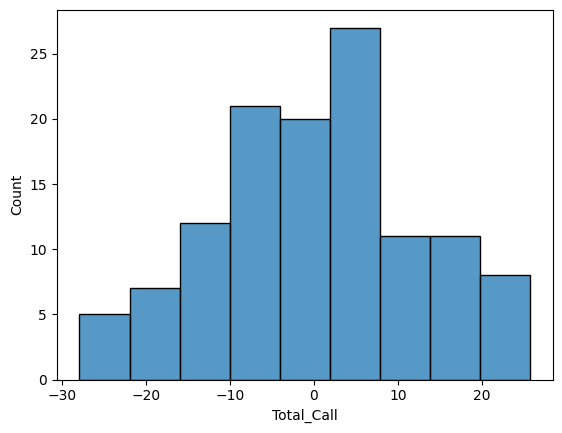

In [ ]:
sns.histplot(data = residuals, x = "Total_Call")

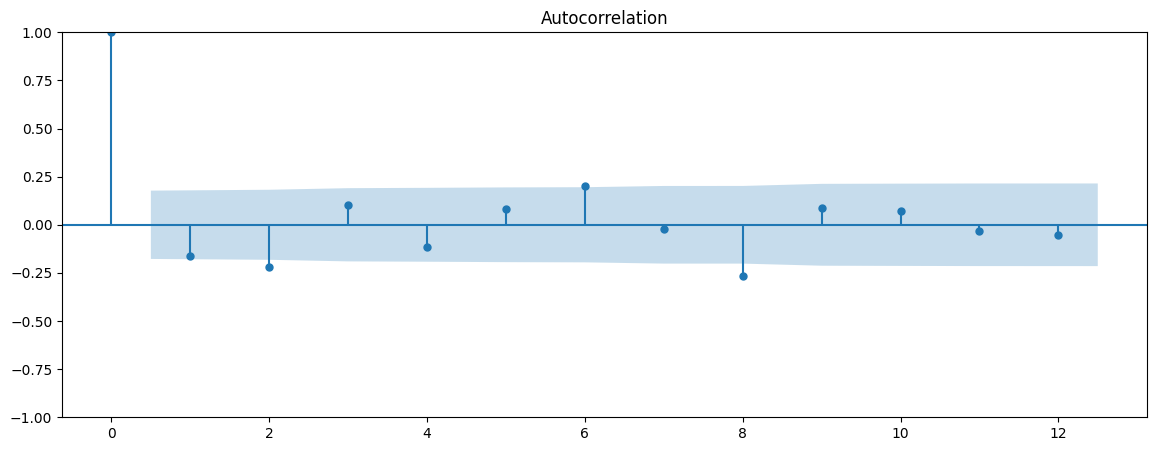

In [ ]:
# ACF plot
plot_acf(
    residuals,
    lags = 12
).set_size_inches((14,5));

In [ ]:
sm.stats.acorr_ljungbox(residuals, lags = 12, return_df=True)

,lb_stat,lb_pvalue
1,3.187584,0.074200
2,9.369007,0.009237
3,10.700478,0.013461
4,12.442220,0.014349
5,13.276317,0.020922
6,18.588167,0.004919
7,18.638293,0.009399
8,28.195130,0.000439
9,29.156706,0.000610
10,29.890533,0.000893


Autocorrelation Test using Ljung-Box Test

*   Null hypothesis: The residuals are independently distributed.
*   Alternate hypothesis: The residuals are not independently distributed; they exhibit serial correlation.

Reject null hypothesis if p-value less than 5%

**Interpretation**: Because p-value less than 5%, then we can reject the null
hypothesis of the test and conclude that the residuals are not independent.

In [ ]:
mean_absolute_error(y_test_arima, y_pred_arima)

9.972328186717787

In [ ]:
mean_squared_error(y_test_arima, y_pred_arima)

151.50488548734526

In [ ]:
np.sqrt(mean_squared_error(y_test_arima, y_pred_arima))

12.308732082848552

# Conclusion

*   The error level is 12 %.
*   The residual is quite good (white noise).
*   The data is quite normal.
*   There is still autocorrelation on residual.
*   Short term forecasting (8 days).







# Predict next value Arima


In [ ]:
fh_arima_1 = ForecastingHorizon(pd.PeriodIndex(pd.date_range("2022-09-1", periods=130, freq="D")), is_relative=False)
fh_arima_1

ForecastingHorizon(['2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04',
             '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
             '2022-09-09', '2022-09-10',
             ...
             '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
             '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
             '2023-01-07', '2023-01-08'],
            dtype='period[D]', length=130, is_relative=False)

In [ ]:
cutoff = pd.Period("2022-09-1", freq="D")
fh_arima_1.to_relative(cutoff)
fh_arima_1.to_absolute(cutoff)

ForecastingHorizon(['2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04',
             '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
             '2022-09-09', '2022-09-10',
             ...
             '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
             '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
             '2023-01-07', '2023-01-08'],
            dtype='period[D]', length=130, is_relative=False)

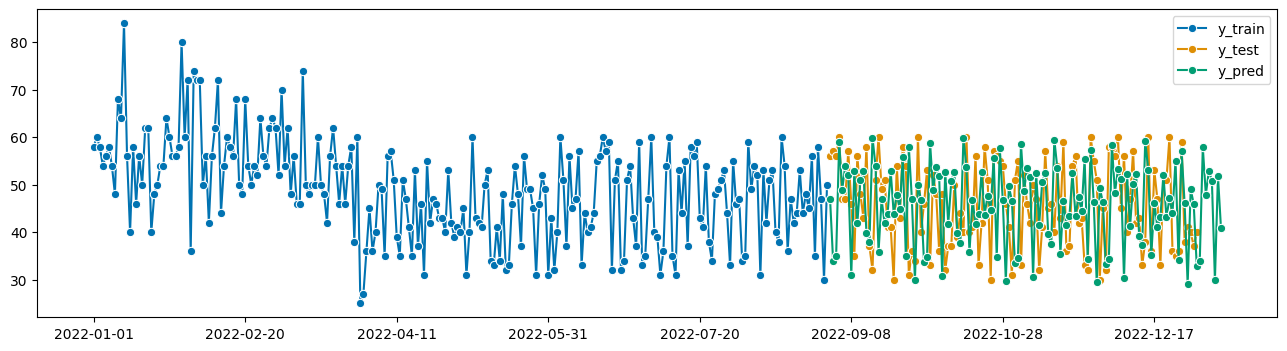

In [ ]:
forecaster_arima_1 = ARIMA(order=(0,1,1), seasonal_order=(0, 1, 0, 30), suppress_warnings=True)

forecaster_arima_1.fit(y_train_arima)
y_pred_arima_1 = forecaster_arima_1.predict(fh_arima_1)
plot_series(y_train_arima, y_test_arima, y_pred_arima_1, labels=["y_train", "y_test", "y_pred"]);

# Collect the data

In [ ]:
y_pred_arima_1 = y_pred_arima_1.reset_index(names='Date')
y_pred_arima_1.head()

,Date,Total_Call
0,2022-09-01,46.939999
1,2022-09-02,33.937476
2,2022-09-03,34.934953
3,2022-09-04,58.932430
4,2022-09-05,48.929907


In [ ]:
y_pred_naive = y_pred_naive.reset_index(names='Date')
y_pred_naive.head()

,Date,Total_Call
0,2022-09-01,47.0
1,2022-09-02,34.0
2,2022-09-03,35.0
3,2022-09-04,59.0
4,2022-09-05,49.0


In [ ]:
y_test_arima = y_test_arima.reset_index(names='Date')
y_test_arima.head()

,Date,Total_Call
0,2022-09-01,56
1,2022-09-02,57
2,2022-09-03,56
3,2022-09-04,60
4,2022-09-05,47


In [ ]:
merge = [y_pred_arima_1,y_pred_naive,y_test_arima]

In [ ]:
df_new = reduce(lambda left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), merge)

In [ ]:
df_new.head()

,Date,Total_Call_x,Total_Call_y,Total_Call
0,2022-09-01,46.939999,47.0,56.0
1,2022-09-02,33.937476,34.0,57.0
2,2022-09-03,34.934953,35.0,56.0
3,2022-09-04,58.932430,59.0,60.0
4,2022-09-05,48.929907,49.0,47.0


In [ ]:
df_new = df_new.rename(columns={"Total_Call_x": "pred_arima"})
df_new = df_new.rename(columns={"Total_Call_y": "pred_naive"})
df_new = df_new.rename(columns={"Total_Call": "y_test"})

In [ ]:
df_new.pred_arima = df_new.pred_arima.round()

In [ ]:
# change month column to date type
df_new['Date'] = df_new['Date'].dt.strftime('%m/%d/%Y')

In [ ]:
df_new = df_new.fillna('')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        130 non-null    object 
 1   pred_arima  130 non-null    float64
 2   pred_naive  130 non-null    float64
 3   y_test      130 non-null    object 
dtypes: float64(2), object(2)
memory usage: 5.1+ KB


In [ ]:
df_col_names = [df_new.columns.values.tolist()]
df_col_values = df_new.values.tolist()

In [ ]:
df_rows = df_new.shape[0]
df_cols = df_new.shape[1]

In [ ]:
worksheet = gsheets.add_worksheet(title="forcasting_new", rows=df_rows, cols=df_cols)

In [ ]:
worksheet.update(df_col_names + df_col_values)

{'spreadsheetId': '1sFOYg2KWqFsgjDClcwwE8J9WhDv9QxZhqc-oteDN9oY',
 'updatedRange': 'forcasting_new!A1:D131',
 'updatedRows': 131,
 'updatedColumns': 4,
 'updatedCells': 524}